<a href="https://colab.research.google.com/github/ArashDehghanyan/ml-practicres/blob/main/Customization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.version.VERSION)

2.8.0


#Basics

In [ ]:
print(tf.reduce_sum([1, 2, 3]).numpy())
print(tf.add(1, 2).numpy())
print(tf.add([1, 2], [3, 4]).numpy())
print(tf.square(5).numpy())
print((tf.square(2) + tf.square(3)).numpy())
x = tf.matmul([[1]], [[1, 2]])
print(x)
print(x.shape)
print(x.dtype)
print(x.numpy())

6
3
[4 6]
25
13
tf.Tensor([[1 2]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>
[[1 2]]


In [ ]:
x = tf.random.uniform([3, 3])

print("Is there a GPU available:")
print(tf.config.list_physical_devices("GPU"))

print("Is the tensor on the GPU #0:")
print(x.device.endswith("GPU:0"))

Is there a GPU available:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Is the tensor on the GPU #0:
True


In [ ]:
print(x.device)

/job:localhost/replica:0/task:0/device:GPU:0


##Explicit device placement

In [ ]:
import time

def time_matmul(x):
    start = time.time()
    for loop in range(10):
        tf.matmul(x, x)
    
    result = time.time() - start
    print("10 loops: {:0.2f}ms".format(1000 * result))

# Force execution on CPU
print("on CPU:")
with tf.device("CPU:0"):
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("CPU:0")
    time_matmul(x)

# Force execution on GPU
print("on GPU:")
with tf.device("GPU:0"):
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)
    

on CPU:
10 loops: 620.01ms
on GPU:
10 loops: 2171.86ms


##Datasets

In [ ]:
ds_tensor = tf.data.Dataset.from_tensor_slices([1,2,3,4,5,6,7,8])

import tempfile
_, filename = tempfile.mkstemp()

with open(filename, 'w') as f:
    f.write("""Line 1
    Line 2
    Line 3
    Lin3 4
    Line 5
    """)

ds_file = tf.data.TextLineDataset(filename)


##Apply transformations

In [ ]:
ds_tensor = ds_tensor.map(tf.square).shuffle(2).batch(2)
ds_file = ds_file.shuffle(2).batch(2)

##Iterate

In [ ]:
print("Elements of ds_tensor:")
for x in ds_tensor:
    print(x)


print("\n\nElements of ds_file:")
for x in ds_file:
    print(x)

Elements of ds_tensor:
tf.Tensor([1 9], shape=(2,), dtype=int32)
tf.Tensor([16  4], shape=(2,), dtype=int32)
tf.Tensor([36 25], shape=(2,), dtype=int32)
tf.Tensor([49 64], shape=(2,), dtype=int32)


Elements of ds_file:
tf.Tensor([b'    Line 2' b'Line 1'], shape=(2,), dtype=string)
tf.Tensor([b'    Line 3' b'    Lin3 4'], shape=(2,), dtype=string)
tf.Tensor([b'    Line 5' b'    '], shape=(2,), dtype=string)


#Layers

In [ ]:
import numpy as np
import tensorflow as tf

print(tf.version.VERSION)
print(tf.config.list_physical_devices('GPU'))

2.8.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

layer(tf.ones((10, 5))).shape

TensorShape([10, 10])

In [ ]:
layer.variables

[<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.11010939,  0.19350135,  0.37618273, -0.2473126 , -0.06733954,
          0.1271798 ,  0.09935647,  0.29709804,  0.22326338,  0.4617676 ],
        [ 0.00079358, -0.08750266,  0.50379604,  0.08723545, -0.49089634,
         -0.54005826,  0.24811238, -0.0426994 , -0.40523708,  0.45907754],
        [ 0.38664526,  0.52150756,  0.16027695,  0.28553164, -0.49305895,
         -0.12187684, -0.5773006 ,  0.4439333 , -0.4152347 , -0.28739855],
        [ 0.5374258 ,  0.10927796,  0.5914728 , -0.01432931, -0.29877844,
         -0.13994545, -0.07057685, -0.5257404 , -0.18129665, -0.29039335],
        [ 0.12775761,  0.31753856,  0.39368802, -0.23998547, -0.44138277,
         -0.19343805,  0.2064774 ,  0.47885185, -0.32723582, -0.15031779]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [ ]:
layer.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.11010939,  0.19350135,  0.37618273, -0.2473126 , -0.06733954,
          0.1271798 ,  0.09935647,  0.29709804,  0.22326338,  0.4617676 ],
        [ 0.00079358, -0.08750266,  0.50379604,  0.08723545, -0.49089634,
         -0.54005826,  0.24811238, -0.0426994 , -0.40523708,  0.45907754],
        [ 0.38664526,  0.52150756,  0.16027695,  0.28553164, -0.49305895,
         -0.12187684, -0.5773006 ,  0.4439333 , -0.4152347 , -0.28739855],
        [ 0.5374258 ,  0.10927796,  0.5914728 , -0.01432931, -0.29877844,
         -0.13994545, -0.07057685, -0.5257404 , -0.18129665, -0.29039335],
        [ 0.12775761,  0.31753856,  0.39368802, -0.23998547, -0.44138277,
         -0.19343805,  0.2064774 ,  0.47885185, -0.32723582, -0.15031779]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [ ]:
layer.kernel, layer.bias

(<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.11010939,  0.19350135,  0.37618273, -0.2473126 , -0.06733954,
          0.1271798 ,  0.09935647,  0.29709804,  0.22326338,  0.4617676 ],
        [ 0.00079358, -0.08750266,  0.50379604,  0.08723545, -0.49089634,
         -0.54005826,  0.24811238, -0.0426994 , -0.40523708,  0.45907754],
        [ 0.38664526,  0.52150756,  0.16027695,  0.28553164, -0.49305895,
         -0.12187684, -0.5773006 ,  0.4439333 , -0.4152347 , -0.28739855],
        [ 0.5374258 ,  0.10927796,  0.5914728 , -0.01432931, -0.29877844,
         -0.13994545, -0.07057685, -0.5257404 , -0.18129665, -0.29039335],
        [ 0.12775761,  0.31753856,  0.39368802, -0.23998547, -0.44138277,
         -0.19343805,  0.2064774 ,  0.47885185, -0.32723582, -0.15031779]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

#Custom layers

In [ ]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs

    def build(self, input_shape):
        self.kernel = self.add_weight(
            "kernel", shape=[int(input_shape[-1]), self.num_outputs]
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.kernel)


In [ ]:
layer = MyDenseLayer(10)
layer(tf.ones([10, 5])).shape

TensorShape([10, 10])

In [ ]:
print([var.name for var in layer.trainable_variables])

['my_dense_layer/kernel:0']


##Residual Block

In [ ]:
from tensorflow.keras import layers

In [ ]:
class ResidualBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResidualBlock, self).__init__(name='')
        filter1, filter2, filter3 = filters

        self.conv2a = layers.Conv2D(filter1, (1, 1))
        self.bn2a = layers.BatchNormalization()

        self.conv2b = layers.Conv2D(filter2, kernel_size=kernel_size, padding='same')
        self.bn2b = layers.BatchNormalization()

        self.conv2c = layers.Conv2D(filter3, (1, 1))
        self.bn2c = layers.BatchNormalization()
    
    def call(self, input_tensor, training=False):
        x = tf.nn.relu(self.bn2a(self.conv2a(input_tensor), training=training))

        x = tf.nn.relu(self.bn2b(self.conv2b(x), training=training))

        x = self.bn2c(self.conv2c(x))

        x += input_tensor

        return tf.nn.relu(x)


In [ ]:
block = ResidualBlock(1, [1, 2, 3])

_ = block(tf.zeros([1, 2, 3, 3]))

In [ ]:
block.layers

In [ ]:
len(block.variables)

18

In [ ]:
block.summary()

Model: ""
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  4         
                                                                 
 batch_normalization (BatchN  multiple                 4         
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           multiple                  4         
                                                                 
 batch_normalization_1 (Batc  multiple                 8         
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           multiple                  9         
                                                                 
 batch_normalization_2 (Batc  multiple                 12        


#Custom training: walkthrough
##Install tfds-nightly dataset

In [1]:
! pip install -q tfds-nightly 

     |████████████████████████████████| 4.2 MB 7.3 MB/s 
     |████████████████████████████████| 76 kB 5.5 MB/s 


In [21]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

print("Tensorflow version: {}".format(tf.__version__))
print("Tensorflow dataset version: {}".format(tfds.__version__))

Tensorflow version: 2.8.0
Tensorflow dataset version: 4.5.2+nightly


##Import dataset
###Preview the data

In [22]:
ds_preview, info = tfds.load('penguins/simple', split='train', with_info=True)
df = tfds.as_dataframe(ds_preview.take(5), info)
print(df)
print(info.features)

   body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm  island  \
0       4200.0             13.9         45.500000              210.0       0   
1       4650.0             13.7         40.900002              214.0       0   
2       5300.0             14.2         51.299999              218.0       0   
3       5650.0             15.0         47.799999              215.0       0   
4       5050.0             15.8         46.299999              215.0       0   

   sex  species  
0    0        2  
1    0        2  
2    1        2  
3    1        2  
4    1        2  
FeaturesDict({
    'body_mass_g': tf.float32,
    'culmen_depth_mm': tf.float32,
    'culmen_length_mm': tf.float32,
    'flipper_length_mm': tf.float32,
    'island': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    'sex': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
})


In [23]:
dataset_split, info = tfds.load('penguins/processed', split=['train[:20%]', 'train[20%:]'], as_supervised=True, with_info=True)
ds_test = dataset_split[0]
ds_train = dataset_split[1]
assert isinstance(ds_test, tf.data.Dataset)

print(info.features)
df_test = tfds.as_dataframe(ds_test.take(5), info)
print("Test dataset sample:")
print(df_test)

df_train = tfds.as_dataframe(ds_train.take(5), info)
print("Train dataset sample:")
print(df_train)

ds_train_batch = ds_train.batch(32)

FeaturesDict({
    'features': Tensor(shape=(4,), dtype=tf.float32),
    'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
})
Test dataset sample:
                                         features  species
0  [0.6545454, 0.22619048, 0.89830506, 0.6388889]        2
1        [0.36, 0.04761905, 0.6440678, 0.4027778]        2
2       [0.68, 0.30952382, 0.91525424, 0.6944444]        2
3   [0.6181818, 0.20238096, 0.8135593, 0.6805556]        2
4  [0.5527273, 0.26190478, 0.84745765, 0.7083333]        2
Train dataset sample:
                                         features  species
0  [0.49818182, 0.6904762, 0.42372882, 0.4027778]        0
1      [0.48, 0.071428575, 0.6440678, 0.44444445]        2
2    [0.7236364, 0.9047619, 0.6440678, 0.5833333]        1
3  [0.34545454, 0.5833333, 0.33898306, 0.3472222]        0
4       [0.10909091, 0.75, 0.3559322, 0.41666666]        0


In [24]:
features, labels = next(iter(ds_train_batch))

print(features)
print(labels)

tf.Tensor(
[[0.49818182 0.6904762  0.42372882 0.4027778 ]
 [0.48       0.07142857 0.6440678  0.44444445]
 [0.7236364  0.9047619  0.6440678  0.5833333 ]
 [0.34545454 0.5833333  0.33898306 0.3472222 ]
 [0.10909091 0.75       0.3559322  0.41666666]
 [0.6690909  0.63095236 0.47457626 0.19444445]
 [0.8036364  0.9166667  0.4915254  0.44444445]
 [0.4909091  0.75       0.37288135 0.22916667]
 [0.33454546 0.85714287 0.37288135 0.2361111 ]
 [0.32       0.41666666 0.2542373  0.1388889 ]
 [0.41454545 0.5952381  0.5084746  0.19444445]
 [0.14909092 0.48809522 0.2542373  0.125     ]
 [0.23636363 0.4642857  0.27118644 0.05555556]
 [0.22181818 0.5952381  0.22033899 0.3472222 ]
 [0.24727273 0.5595238  0.15254237 0.25694445]
 [0.63272727 0.35714287 0.88135594 0.8194444 ]
 [0.47272727 0.15476191 0.6440678  0.4722222 ]
 [0.6036364  0.23809524 0.84745765 0.7361111 ]
 [0.26909092 0.5595238  0.27118644 0.16666667]
 [0.28       0.71428573 0.20338982 0.5416667 ]
 [0.10545454 0.5714286  0.33898306 0.2847222 ]
 [

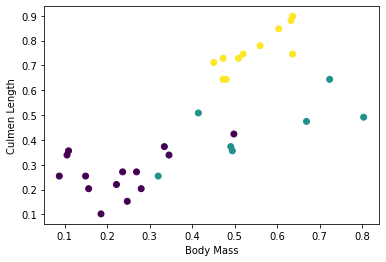

In [25]:
plt.scatter(
    features[:, 0],
    features[:, 2],
    c = labels,
    cmap='viridis'
)

plt.xlabel('Body Mass')
plt.ylabel('Culmen Length')
plt.show()

##Define model

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])


In [27]:
predictions = model(features)
# This example returns a logit for each class
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-0.117373  , -0.02241163, -0.13526282],
       [-0.28063267,  0.04080224, -0.16245909],
       [-0.19166864, -0.02475204, -0.20001304],
       [-0.05105691, -0.02570873, -0.0887336 ],
       [ 0.09852643, -0.03030641,  0.01450325]], dtype=float32)>

In [28]:
# Convert logits to probabilities by softmax function
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.3244767 , 0.35679987, 0.31872344],
       [0.28534377, 0.3935191 , 0.32113716],
       [0.31512478, 0.372369  , 0.31250617],
       [0.33459407, 0.34318382, 0.3222222 ],
       [0.35733035, 0.31413656, 0.32853308]], dtype=float32)>

In [29]:
print("Predictions: ", tf.argmax(predictions, axis=1))
print("Labels: ", labels)

Predictions:  tf.Tensor([1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0], shape=(32,), dtype=int64)
Labels:  tf.Tensor([0 2 1 0 0 1 1 1 0 1 1 0 0 0 0 2 2 2 0 0 0 0 2 2 1 2 0 2 2 2 2 0], shape=(32,), dtype=int64)


##Define Loss and gradient

In [30]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [31]:
def loss(model, x, y, training):
    # training=training is needed only when there are layers with different
    # behaviour during training versus inference (e. g. Dropout)
    y_ = model(x, training=training)
    return loss_object(y_true=y, y_pred=y_)

In [32]:
l = loss(model, features, labels, training=False)
print("Loss test:", l.numpy())

Loss test: 1.0858477


In [33]:
def grad(model, inputs, targets):
    """Calculate gradient."""
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, training=True)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)
    

##Create Optimizer

In [34]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [35]:
# Calculate single optimization step
loss_value, grads = grad(model, features, labels)
print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(), 
                                          loss_value.numpy()))
# Apply gradients to the model trainable weights and biases
optimizer.apply_gradients(zip(grads, model.trainable_variables))
print("Step: {},\t\tLoss: {}".format(optimizer.iterations.numpy(), 
                                     loss(model, features, labels, training=True).numpy()))


Step: 0, Initial Loss: 1.0858477354049683
Step: 1,		Loss: 1.0846877098083496


In [36]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Train loop using batch of 32
    for x, y in ds_train_batch:
        loss_value, grads = grad(model , x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        epoch_loss.update_state(loss_value)
        epoch_accuracy.update_state(y, model(x, training=True))

    # End epoch
    train_loss_results.append(epoch_loss.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch: {:03d}\tLoss: {:0.3f}\tAccuracy: {:0.3f}".format(epoch, epoch_loss.result(), epoch_accuracy.result()))


Epoch: 000	Loss: 1.077	Accuracy: 0.588
Epoch: 050	Loss: 0.723	Accuracy: 0.801
Epoch: 100	Loss: 0.446	Accuracy: 0.805
Epoch: 150	Loss: 0.306	Accuracy: 0.921
Epoch: 200	Loss: 0.216	Accuracy: 0.955


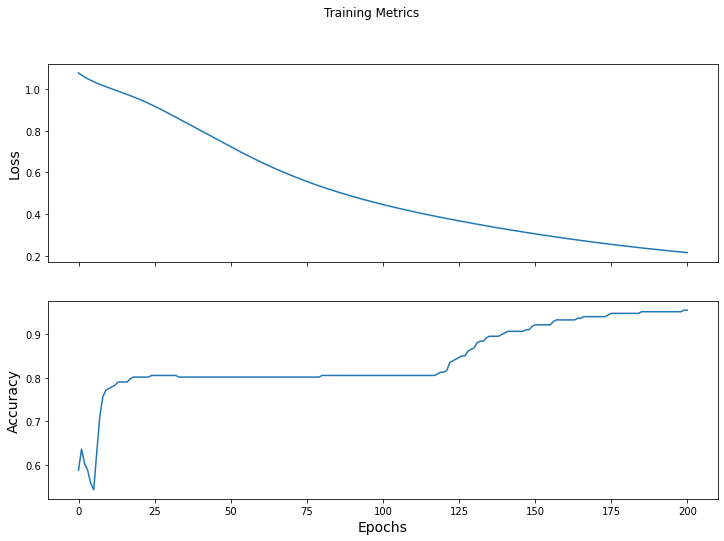

In [37]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle("Training Metrics")

axes[0].set_ylabel('Loss', fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel('Accuracy', fontsize=14)
axes[1].plot(train_accuracy_results)
axes[1].set_xlabel('Epochs', fontsize=14)
plt.show()

##Evaluate model predictions

In [43]:
test_accuracy = tf.keras.metrics.Accuracy()
ds_test_batch = ds_test.batch(10)

for (x, y) in ds_test_batch:
    logits = model(x, training=False)
    predictions = tf.argmax(logits, axis=1, output_type=tf.int64)
    test_accuracy.update_state(predictions, y)

print("Test accuracy: {:.3f}".format(test_accuracy.result()))

Test accuracy: 0.955


In [44]:
tf.stack([y, predictions], axis=1)

<tf.Tensor: shape=(7, 2), dtype=int64, numpy=
array([[1, 1],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [0, 0]])>

##Use trained model to make predictions

In [45]:
class_names = {0: 'Adélie penguin', 1: 'Chinstrap penguin', 2: 'Gentoo penguin'}

In [46]:
predict_dataset = tf.convert_to_tensor([
    [0.3, 0.8, 0.4, 0.5,],
    [0.4, 0.1, 0.8, 0.5,],
    [0.7, 0.9, 0.8, 0.4]
])

predictions = model(predict_dataset, training=False)
for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    probability = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("Example: {} prediction: {} ({:4.1f}%)".format(i, name, 100*probability))
    

Example: 0 prediction: Adélie penguin (92.3%)
Example: 1 prediction: Gentoo penguin (89.8%)
Example: 2 prediction: Chinstrap penguin (67.7%)
